<a href="https://colab.research.google.com/github/gedeon129/Data-110/blob/main/HW_10_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


Import the Dataset : DataMontgomerycountrymd.gov

In [33]:
df=pd.read_csv('https://raw.githubusercontent.com/Reben80/Data110-22016/refs/heads/main/dataset/Daily_Arrests_20241001%20(1).csv')

Exploring your data with Pandas


In [16]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LAST NAME    473 non-null    object
 1   FIRST NAME   473 non-null    object
 2   MIDDLE NAME  376 non-null    object
 3   AGE          473 non-null    int64 
 4   STREET       473 non-null    object
 5   CITY         473 non-null    object
 6   STATE        473 non-null    object
 7   ARREST DATE  473 non-null    object
 8   OFFENSE      473 non-null    object
dtypes: int64(1), object(8)
memory usage: 33.4+ KB


,AGE
count,473.000000
mean,34.012685
std,12.233595
min,16.000000
25%,25.000000
50%,31.000000
75%,41.000000
max,86.000000


In [17]:
df.isnull().sum()

,0
LAST NAME,0
FIRST NAME,0
MIDDLE NAME,97
AGE,0
STREET,0
CITY,0
STATE,0
ARREST DATE,0
OFFENSE,0


#1 Filter Theft _ related Offenses

In [18]:
theft_df=df[df['OFFENSE'].str.contains('theft',case=False,na=False)]
theft_df.head()

,LAST NAME,FIRST NAME,MIDDLE NAME,AGE,STREET,CITY,STATE,ARREST DATE,OFFENSE
3,PEREZ GONZALES,JOSE,NaN,37,12900 Block Of TWINBROOK PKWY,ROCKVILLE,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
13,CLARK,MICHAEL,ALANZOE,40,1300 Block Of new york ave,WASHINGTON,DC,09/20/2024,"THEFT: $100 TO UNDER $1,500"
14,MEJIA POSADA,RENE,ALEXANDER,26,0 Block Of NINA CT,GAITHERSBURG,MD,09/19/2024,"THEFT: $100 TO UNDER $1,500"
22,ESCOBAR,DEYANIRA,HILARIA,35,400 Block Of COLLEGE PKWY,ROCKVILLE,MD,09/20/2024,"THEFT: $100 TO UNDER $1,500"
30,WEST,MAIA,FRANCESCA,28,9900 Block Of BIG ROCK RD,SILVER SPRING,MD,09/21/2024,"THEFT: $1,500 TO UNDER $25,000"


2 Exploraty Data Analysis (EDA)

In [19]:
# Total number of theft incidents

In [20]:
count_theft=theft_df['OFFENSE'].count()
print(count_theft)

96


The total number of theft incidents is 96
Age range of individuals involved in theft offenses: 18 to 67

---



In [21]:
# Range of ages involved in theft offenses
age_range = theft_df['AGE'].agg(['min', 'max'])
print("Age range of individuals involved in theft offenses:", age_range['min'], "to", age_range['max'])


Age range of individuals involved in theft offenses: 18 to 67


# Visualizing Theft Offenses By Day of the week

In [22]:
# day of week has the highest number of theft arrests

In [23]:
df['ARREST DATE']=pd.to_datetime(df['ARREST DATE'])
df['dayOfweek']=df['ARREST DATE'].dt.dayofweek
df.info()
df.describe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   LAST NAME    473 non-null    object        
 1   FIRST NAME   473 non-null    object        
 2   MIDDLE NAME  376 non-null    object        
 3   AGE          473 non-null    int64         
 4   STREET       473 non-null    object        
 5   CITY         473 non-null    object        
 6   STATE        473 non-null    object        
 7   ARREST DATE  473 non-null    datetime64[ns]
 8   OFFENSE      473 non-null    object        
 9   dayOfweek    473 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 35.2+ KB


<bound method NDFrame.describe of               LAST NAME FIRST NAME MIDDLE NAME  AGE  \
0    ENCARNAION HERASME       LUIS         NaN   24   
1      DEL CID-PALACIOS    JEFFREY    MITCHELL   34   
2                CHAVEZ     SANDRA         NaN   21   
3        PEREZ GONZALES       JOSE         NaN   37   
4                 SIMON      DAVID       BRETT   74   
..                  ...        ...         ...  ...   
468       ZELAYA MENDEZ       JOSE        LUIS   21   
469             RUSHIKA    TINASHE        KAYS   36   
470        AYALA CASTRO     CERIDE  ALEXANDRIA   22   
471            ESQUIVEL      URIEL    DE JESUS   22   
472                 LEE      JAMAL     GREGORY   38   

                               STREET           CITY STATE ARREST DATE  \
0               Block Of 6841 TREXLEY        ASHFORK    MD  2024-09-19   
1             11700 Block Of Leona St  SILVER SPRING    MD  2024-09-19   
2      0 Block Of Silver Kettle Court   GAITHERSBURG    MD  2024-09-19   
3       12900 Block Of TWINBROOK PKWY      ROCKVILLE    MD  2024-09-19   
4       12800 Block Of BRUSHWOOD TERR        Potomac    MD  2024-09-19   
..                                ...            ...   ...         ...   
468          100 Block Of Schuyler Rd  SILVER SPRING    MD  2024-09-19   
469  4500 Block Of chester wood court  SILVER SPRING    MD  2024-09-19   
470                  NO FIXED ADDRESS   GAITHERSBURG    MD  2024-09-19   
471     400 Block Of blandford street      ROCKVILLE    MD  2024-09-09   
472     1400 Block Of Alfalfa Terrace          Olney    MD  2024-09-10   

                                               OFFENSE  dayOfweek  
0                             VIOLATE PROTECTIVE ORDER          3  
1                    INTIMIDATE/INFLU JUROR-FELONY OFF          3  
2                                ASSAULT-SECOND DEGREE          3  
3                          THEFT: $100 TO UNDER $1,500          3  
4                            DRIVING UNINSURED VEHICLE          3  
..                                                 ...        ...  
468                          CDS: POSSESS-NOT CANNABIS          3  
469                               ASSAULT-FIRST DEGREE          3  
470                              ASSAULT-SECOND DEGREE          3  
471  (DRIVING/ATTEMPTING TO) DRIVE MOTOR VEH. ON HW...          0  
472                        THEFT: $100 TO UNDER $1,500          1  

[473 rows x 10 columns]>

<BarContainer object of 7 artists>

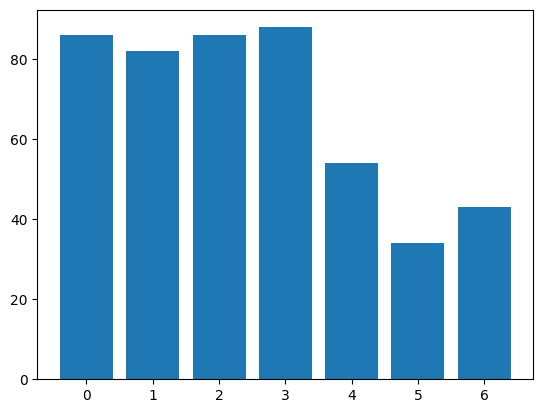

In [24]:

day_counts = df['dayOfweek'].value_counts()  # Access using the new column name 'dayOfweek'
# Map the day of the week index to its name
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(day_counts.index, day_counts)


1--Thursday has the highest number of theft arrests.


2--The reaons for this trend.

one possibility is that many people receive their paycheck on friday , which might lead to increased spending and potentially more theft_related activities as people are out shopping or socializing . Also, law enforcement may have specific strategies or increased patrols on thurdays, leading to more arrests. There could be also to certain evenys or activites that occur more frequently on thurdays, which could contribute to higher theft rates.


4 ** Age Distribution of theft Offenders**


<ipython-input-25-cfdee53bd119>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(theft_df['AGE'], shade=True)


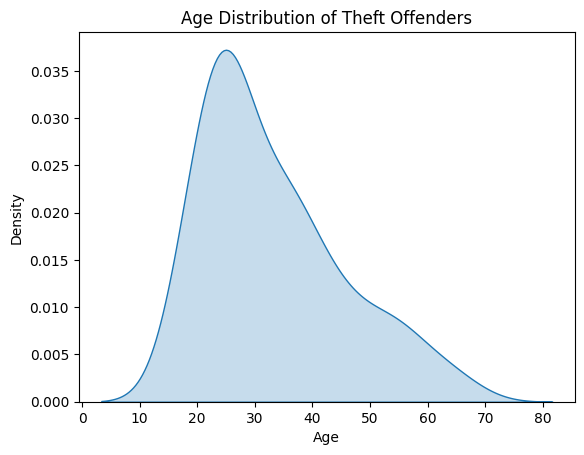

In [25]:
sns.kdeplot(theft_df['AGE'], shade=True)
plt.title('Age Distribution of Theft Offenders')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()



The age distribution of offenders shows that theft offenses are most common among individuals of the range age [ 20, 30].

5 Offense analysis

<BarContainer object of 8 artists>

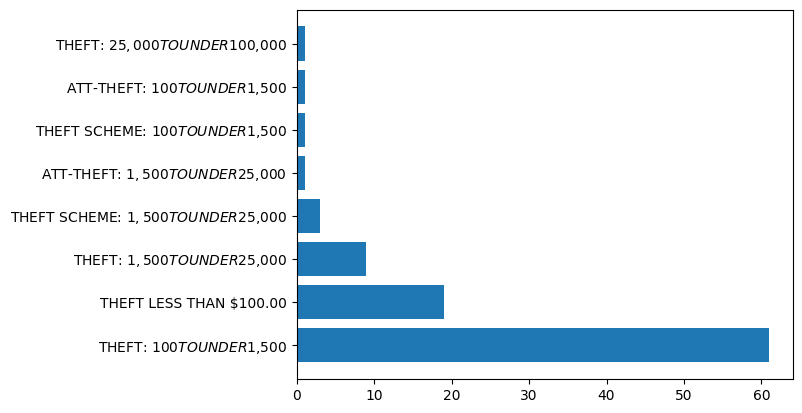

In [26]:
theft_offense_counts=theft_df['OFFENSE'].value_counts()
plt.barh(theft_offense_counts.index,theft_offense_counts)

Kinds of theft  most common are : 100 TOUNDER 1,500

6. yes we can make some other visualization related to theft offenses.

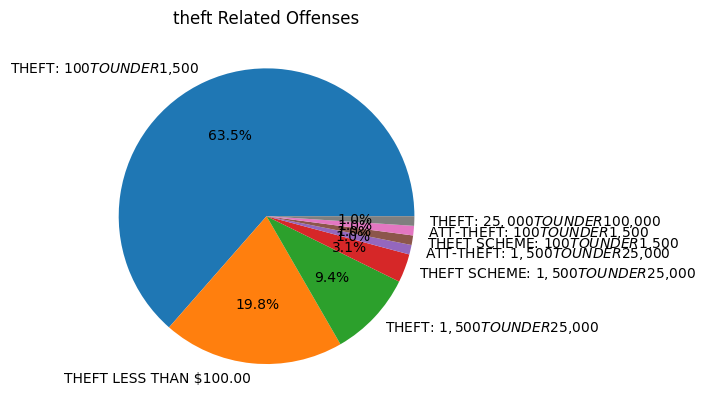

In [27]:
plt.pie(theft_offense_counts, labels=theft_offense_counts.index, autopct='%1.1f%%')
plt.title('theft Related Offenses')

plt.show()


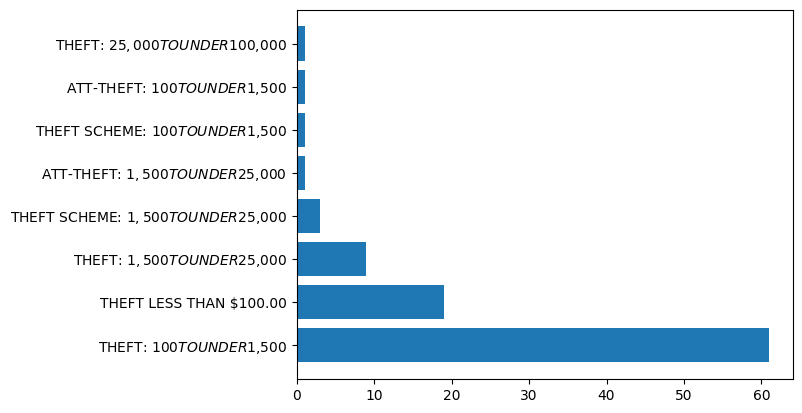

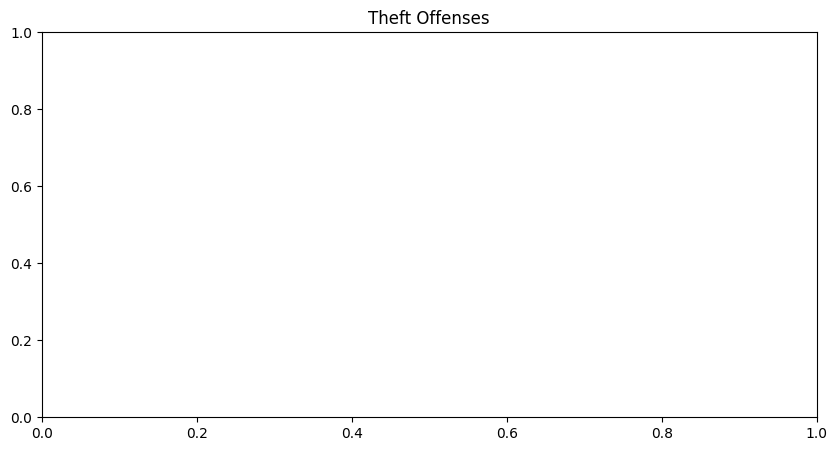

In [28]:
import matplotlib.pyplot as plt

# Count the occurrences of each offense
offense_counts = theft_df['OFFENSE'].value_counts()

# Plot a horizontal bar chart
plt.barh(offense_counts.index, offense_counts.values)

# Set the size of the figure
plt.figure(figsize=(10, 5))

# Title of the chart
plt.title('Theft Offenses')

# Show the plot
plt.show()
